# NYC COVID-19 summary

## 0. Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read Data

In [3]:
data_file = '../data/nyc-health-daily-data-summary/nyc-covid-19-summary.csv'
df = pd.read_csv(data_file)
df

,date,total_cases,age_median,age_min,age_max,age_0_to_4,age_5_to_17,age_18_to_49,age_50_to_64,age_65_and_over,...,sex_female,sex_male,sex_unknown,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island,borough_unknown,deaths
0,2020-03-17,923,NaN,NaN,NaN,0,25,457,211,230,...,378,536,NaN,106,236,290,248,42,1,10
1,2020-03-18,2009,NaN,NaN,NaN,5,42,1034,463,464,...,850,1155,4.0,303,505,590,533,77,1,19
2,2020-03-19,3954,NaN,NaN,NaN,14,94,2117,926,800,...,1630,2315,9.0,496,1195,1038,1042,179,4,26
3,2020-03-20,5683,45.0,0.0,105.0,26,131,3080,1330,1112,...,2317,3355,11.0,736,1740,1402,1514,285,6,43
4,2020-03-21,8115,45.0,0.0,105.0,34,189,4456,1929,1502,...,3318,4787,10.0,1071,2484,1863,2254,437,6,60


## 2. Cases by Age Group

In [6]:
df.columns

Index(['date', 'total_cases', 'age_median', 'age_min', 'age_max', 'age_0_to_4',
       'age_5_to_17', 'age_18_to_49', 'age_50_to_64', 'age_65_and_over',
       'age_unknown', 'age_50_and_over', 'age_under_50', 'sex_female',
       'sex_male', 'sex_unknown', 'borough_bronx', 'borough_brooklyn',
       'borough_manhattan', 'borough_queens', 'borough_staten_island',
       'borough_unknown', 'deaths'],
      dtype='object')

In [81]:
values.astype(int)

array([   5,   34,  189, 4456, 1929, 1502])

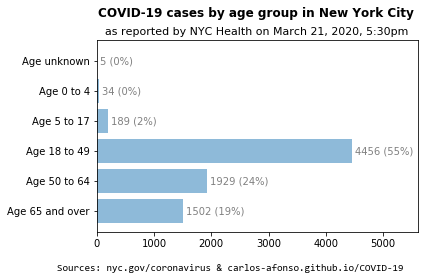

In [107]:
fig = plt.figure()

cols = ['age_unknown', 'age_0_to_4', 'age_5_to_17', 'age_18_to_49', 'age_50_to_64', 'age_65_and_over']
labels = [x.replace('_', ' ').capitalize() for x in cols]
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.barh(labels, values, alpha=0.5)

plt.xlim(0, 5600)

for xy in zip(values, range(len(values))):
    note = str(xy[0]) + ' (' + str(int(round(100 * xy[0] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(3, 0), textcoords='offset points', ha='left', va='center', color='gray')

plt.gca().invert_yaxis()

#plt.suptitle('NYC\'s COVID-19 cases by age group', x=0.6, fontweight='bold') #fontsize=14
plt.suptitle('COVID-19 cases by age group in New York City', x=0.6, fontweight='bold')
plt.title('as reported by NYC Health on March 21, 2020, 5:30pm', fontsize=11)

text = 'Sources: nyc.gov/coronavirus & carlos-afonso.github.io/COVID-19'
plt.text(-700, 7, text, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [108]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-age-group'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)